# Randomness

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We refer to random variables with countable event spaces as discrete random variables and random variables with uncountable event spaces as continuous random variables.

Examples:

* A person's work status is either employed, unemployed, or not in the labor force. Discrete.
* The change in a stock price can be any real number between opening price and infinity. Continuous. 

## Using numpy

In [2]:
rng = np.random.default_rng() # Obtain a random number generator object

In [3]:
rng.random(size=10) # uniform distribution in the internal [0,1]

array([0.17110428, 0.35297286, 0.80536445, 0.07179993, 0.8335875 ,
       0.03158778, 0.18233784, 0.60059566, 0.33124584, 0.00708361])

In [4]:
rng.integers(1,7,size=10) # discrete uniform distribution in the interval [1,6]

array([4, 2, 6, 1, 5, 5, 6, 4, 3, 4])

In [5]:
rng.normal(size=10) # standard normal 

array([-0.06071779,  1.24198136,  0.54225956, -0.44895588,  1.26103978,
       -0.80903196,  0.4150141 ,  0.69164398, -1.44821621,  2.21045277])

In [6]:
rng.normal(loc=1,scale=4, size=10) # normal with mean 1, and std 4

array([ 1.70938468,  2.73573244,  0.11593426,  8.03954262, -3.22401735,
       -5.75211066, -1.69430527, -0.89574898,  3.85505174, 11.23986953])

In [7]:
np.mean(rng.normal(loc=1,scale=4, size=10000)) # compute sample mean

0.943054141739816

In [8]:
np.std(rng.normal(loc=1,scale=4, size=10000)) # sample standard deviation

4.016364121064437

In [9]:
# randomize the order of numbers
# generate an arrange of numbers first
sample = np.arange(19)

In [10]:
sample

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [11]:
rng.shuffle(sample)

In [12]:
sample

array([ 5, 14, 11, 15, 17, 18,  2,  9,  1,  7, 16, 12,  6, 13,  8,  0,  4,
       10,  3])

## Using Scipy

### Binomial distribution

* There are two potential outcomes per trial
* the probability of success (p) is the same across all trials
* the number of trials is fixed
* each trial is independent

The probability that an adult man in the labor force who is unemployed is about 5\%. A random sample of 10 men is taken.

Find the probability that

* all 10 men are unemployed
* no men are unemployed
* exactly 2 men are unemployed
* at least 2 men are unemployed

In [14]:
answer = 0.05**10

In [19]:
f'{answer:.15f}'

'0.000000000000098'

In [20]:
0.95**10

0.5987369392383787

In [22]:
import math

In [23]:
math.comb(10,2)*0.05**2*0.95**8

0.07463479852001952

In [24]:
1-0.95**10-math.comb(10,1)*0.05*0.95**9

0.08613835589931679

Now answer with `scipy.stats`

In [4]:
from scipy.stats import binom

In [26]:
# pmf: probability mass function
binom.pmf(10,10,0.05) 

9.765625000000005e-14

In [27]:
binom.pmf(0,10,0.05)

0.5987369392383787

In [29]:
binom.pmf(2,10,0.05)

0.07463479852001963

In [30]:
1-binom.cdf(1,10,.05) #cdf: cumulative distribution function
# binom.cdf(1,10,.05): probability that the number of unemployed is less or equal to 1 

0.0861383558993164

Visualisation

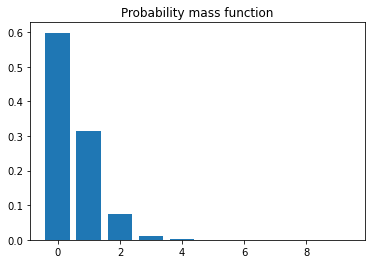

In [5]:
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x,binom.pmf(x,10,.05))
ax.set_title('Probability mass function')
plt.show()

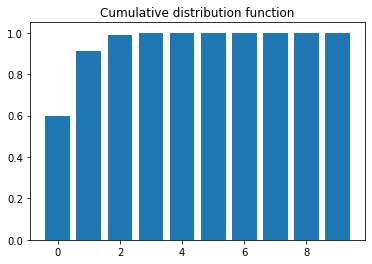

In [6]:
x = np.arange(10)
fig, ax = plt.subplots()
ax.bar(x,binom.cdf(x,10,.05))
ax.set_title('Cumulative distribution function')
plt.show()

Simulate many draws from the distribution, and show the distribution of the sample mean - the mean number of unemployed people.

In [33]:
binom.rvs(10,.05,size=10) # rvs: generate random variables

array([0, 1, 0, 0, 1, 2, 0, 1, 0, 0])

In [34]:
np.mean(binom.rvs(10,.05,size=10))

0.7

In [35]:
size = 10000
means = np.zeros(size)
for j in np.arange(size):
    means[j] = np.mean(binom.rvs(10,.05,size=10))

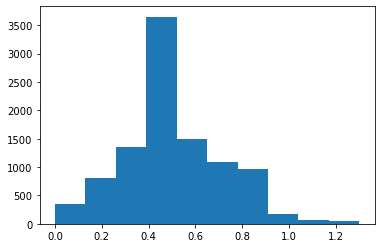

In [36]:
fig, ax = plt.subplots()
ax.hist(means)
plt.show()

In [37]:
binom.mean(10,.05)

0.5

### Poisson Distribution

Describes the number of events occurring in a fixed time interval
* The rate at which events occur is constant
* events are independent
- Requires only one parameter $\lambda$ (mean)
- Bounded by 0 and $\infty$
- $E(x)=\lambda$ and $var(x)=\lambda$

On average, 12 students visit Henry during his office hours per week.

* What is the probability that 10 students go to Henry's office hours next week?
* What is the probability that at least 10 students go to Henry's office hours next week?
* What is the probability that more than 1 student go to Henry's office hours on Monday?

In [10]:
from scipy.stats import poisson

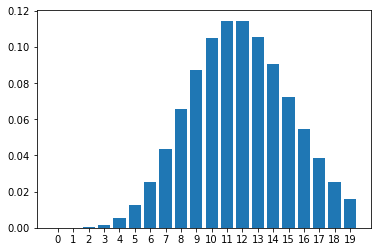

In [49]:
x = np.arange(20)
fig, ax = plt.subplots()
ax.bar(x,poisson.pmf(x,12))
ax.set_xticks(range(20))
plt.show()

In [51]:
poisson.pmf(10,12)

0.10483725588365922

In [50]:
1-poisson.cdf(9,12) 
# poisson.cdf(9,12) the probability that 9 or less students visit Henry

0.7576078383294875

In [52]:
1-poisson.cdf(1,6)

0.9826487347633355

Simulate, plot the distribution of the sample mean

In [53]:
means = np.zeros(size)
for j in np.arange(size):
    means[j] = np.mean(poisson.rvs(12,size=10))

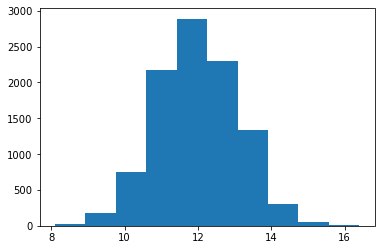

In [54]:
fig, ax = plt.subplots()
ax.hist(means)
plt.show()

### Exponential distribution

The inverse of Poisson:

* Poisson: the number of events per unit of time
* Exponential: time it takes until an event first occurs
* Is a continuous distribution

Examples:

* Poission: the number of soldiers killed by horsekicks per year in the Prussian army (mean = 0.61)
* Exponential: years until the next soldier gets killed by horsekicks

In [8]:
from scipy.stats import expon

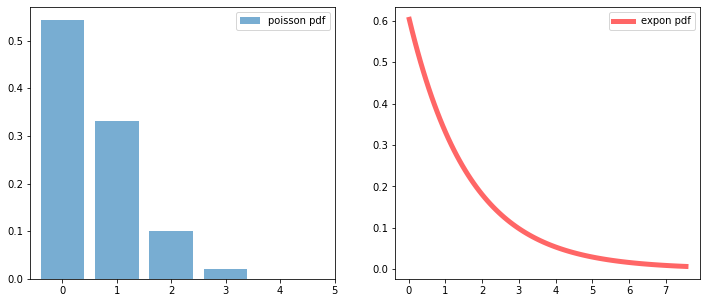

In [16]:
# look up for what .ppf() does on your own
# for continuous random variables, the proper terminology is probability density functions (pdf)
# instead of pmf.
fig, ax = plt.subplots(1,2,figsize=(12,5))
x2 = np.linspace(expon.ppf(0.01,scale=1/0.61), expon.ppf(0.99,scale=1/.61), 100)
x1 = np.linspace(poisson.ppf(0.01,0.61), poisson.ppf(0.99,0.61), 100)
ax[0].bar(x1, poisson.pmf(x1,0.61),alpha=0.6, label='poisson pdf')
ax[0].set_xticks(range(6))
ax[0].legend()
ax[1].plot(x2, expon.pdf(x2,scale=1/0.61),'r-', lw=5, alpha=0.6, label='expon pdf')
ax[1].legend()
plt.show()

What was the probability that the next horsekick death happened in less than 2 years?

In [57]:
expon.cdf(2,scale=1/.61)

0.7047698330759857

Exercise

Simulate many draws from the exponential distribution, and plot the histogram of the mean value of x.

Central Limite Theorem

As n increases, the distribution of the sample mean approaches a normal distribution.

### Gamma distribution

Similar to the Exponential distribution. Difference:

* exponential: the time until the first event occurs
* gamma: the time until the kth event occurs

Parameters:

a: the number of events. If a=1, it becomes the exponential distribution.
If a is an integer, it becomes the Erlang distribution

β: the rate of events (average number of events per unit of time), same as the mean in Poisson. 
Scale=1/β (mean wait time).

In [58]:
from scipy.stats import gamma

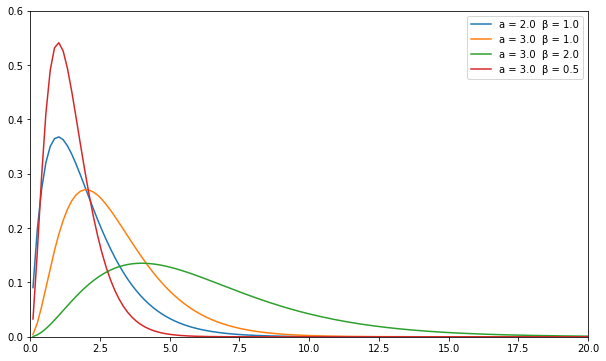

In [59]:
def plot_gamma(a, β, x, ax=None):
    if ax is None:
        _, ax = plt.subplots()

    # scipy refers to the rate parameter beta as a scale parameter
    pdf_x = gamma(a, scale=β).pdf(x)
    ax.plot(x, pdf_x, label=f"a = {a}  β = {β}")

    return ax

fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0.1, 20, 130)
plot_gamma(2.0, 1.0, x, ax)
plot_gamma(3.0, 1.0, x, ax)
plot_gamma(3.0, 2.0, x, ax)
plot_gamma(3.0, 0.5, x, ax)
ax.set_ylim((0, 0.6))
ax.set_xlim((0, 20))
ax.legend();